In [1]:
# attempt to read in LH sims and plot data.
import pandas as pd
import matplotlib as mpl
import matplotlib.colors as cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pickle
import os

/tmp/ipykernel_4777/57903043.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [9]:
import os
import pandas as pd

# Define the directory containing the LH_X files
directory = "/home/jovyan/camels/play/synth-play/LH/output/"

# Get all files in the directory
files = os.listdir(directory)

# Filter out files that start with "LH_" and end with ".txt"
LH_X_files = [file for file in files if file.startswith("LH_") and file.endswith(".txt")]

# Initialize lists to store data
phia = []
phi_sigmaa = []
binsa = []
LH_X_values = []

# Iterate over LH_X files
for LH_X_file in LH_X_files:
    # Define the file path
    file_path = os.path.join(directory, LH_X_file)
    
    # Extract LH_X value from the file name (remove the ".txt" extension)
    LH_X = LH_X_file[:-4]
    
    # Initialize an empty dictionary to store variable names and their values
    variable_data = {}

    # Open the text file for reading
    with open(file_path, 'r') as file:
        # Initialize variables to store the current variable name and its values
        current_variable_name = None
        current_variable_values = []

        # Iterate over each line in the file
        for line in file:
            # Remove leading and trailing whitespace from the line
            line = line.strip()

            # Check if the line is empty
            if not line:
                continue

            # Check if the line is a variable name
            if line in ['phi', 'phi_sigma', 'hist', 'massBinLimits']:
                # If it's a new variable name, update the current variable name and reset the values list
                if current_variable_name is not None:
                    variable_data[current_variable_name] = current_variable_values
                    current_variable_values = []

                current_variable_name = line
            else:
                # If it's not a variable name, convert the value to float and append it to the values list
                current_variable_values.append(float(line))

        # Add the last variable data to the dictionary
        if current_variable_name is not None:
            variable_data[current_variable_name] = current_variable_values
        
        # Extract specific variables
        phi = variable_data.get('phi')
        phi_sigma = variable_data.get('phi_sigma')
        bins = variable_data.get('massBinLimits')

        phia.append(phi)
        phi_sigmaa.append(phi_sigma)
        binsa.append(bins)
        LH_X_values.append(LH_X)

# Create a DataFrame from the lists
df = pd.DataFrame({'LH_X': LH_X_values, 'phi': phia, 'phi_sigma': phi_sigmaa, 'bins': binsa})

# Display the DataFrame
df


,LH_X,phi,phi_sigma,bins
0,LH_0,"[0.00015987453159307786, 0.0002213647360519539...","[4.434121702304844e-05, 5.217616865930228e-05,...","[-22.0, -21.5, -21.0, -20.5, -20.0, -19.5, -19..."
1,LH_1,"[1.2298040891775219e-05, 1.2298040891775219e-0...","[1.2298040891775219e-05, 1.2298040891775219e-0...","[-22.0, -21.5, -21.0, -20.5, -20.0, -19.5, -19..."
2,LH_10,"[0.0, 6.143559877543997e-05, 6.143559877543997...","[0.0, 2.7474835020057322e-05, 2.74748350200573...","[-22.0, -21.5, -21.0, -20.5, -20.0, -19.5, -19..."
3,LH_100,"[0.0, 1.2298040891775219e-05, 4.91921635671008...","[0.0, 1.2298040891775219e-05, 2.45960817835504...","[-22.0, -21.5, -21.0, -20.5, -20.0, -19.5, -19..."
4,LH_101,"[0.00016015885983260023, 0.0002094385090118618...","[4.442007548817616e-05, 5.079629968986957e-05,...","[-22.0, -21.5, -21.0, -20.5, -20.0, -19.5, -19..."
...,...,...,...,...
236,LH_95,"[2.4596081783550438e-05, 6.14902044588761e-05,...","[1.739205621976743e-05, 2.7499255424081526e-05...","[-22.0, -21.5, -21.0, -20.5, -20.0, -19.5, -19..."
237,LH_96,"[7.378824535065131e-05, 0.00014757649070130263...","[3.0123925020731487e-05, 4.2601663316228686e-0...","[-22.0, -21.5, -21.0, -20.5, -20.0, -19.5, -19..."
238,LH_97,"[2.4596081783550438e-05, 1.2298040891775219e-0...","[1.739205621976743e-05, 1.2298040891775219e-05...","[-22.0, -21.5, -21.0, -20.5, -20.0, -19.5, -19..."
239,LH_98,"[7.378824535065131e-05, 0.0001229804089177522,...","[3.0123925020731487e-05, 3.888981997589799e-05...","[-22.0, -21.5, -21.0, -20.5, -20.0, -19.5, -19..."


In [7]:
df['LH_X'].unique()

array(['LH_0', 'LH_1', 'LH_10', 'LH_100', 'LH_101', 'LH_102', 'LH_103',
       'LH_105', 'LH_106', 'LH_107', 'LH_108', 'LH_109', 'LH_11',
       'LH_110', 'LH_111', 'LH_112', 'LH_113', 'LH_114', 'LH_115',
       'LH_116', 'LH_117', 'LH_118', 'LH_119', 'LH_12', 'LH_120',
       'LH_121', 'LH_122', 'LH_123', 'LH_124', 'LH_125', 'LH_126',
       'LH_127', 'LH_128', 'LH_129', 'LH_13', 'LH_130', 'LH_131',
       'LH_132', 'LH_133', 'LH_134', 'LH_135', 'LH_136', 'LH_137',
       'LH_138', 'LH_139', 'LH_14', 'LH_140', 'LH_141', 'LH_142',
       'LH_143', 'LH_144', 'LH_145', 'LH_146', 'LH_147', 'LH_148',
       'LH_149', 'LH_15', 'LH_150', 'LH_151', 'LH_152', 'LH_153',
       'LH_154', 'LH_155', 'LH_156', 'LH_157', 'LH_158', 'LH_159',
       'LH_16', 'LH_160', 'LH_161', 'LH_162', 'LH_163', 'LH_164',
       'LH_165', 'LH_166', 'LH_167', 'LH_168', 'LH_169', 'LH_17',
       'LH_170', 'LH_171', 'LH_172', 'LH_173', 'LH_174', 'LH_175',
       'LH_176', 'LH_18', 'LH_19', 'LH_2', 'LH_20', 'LH_200', 'L

/tmp/ipykernel_367/1018121165.py:20: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(1e-5,0)


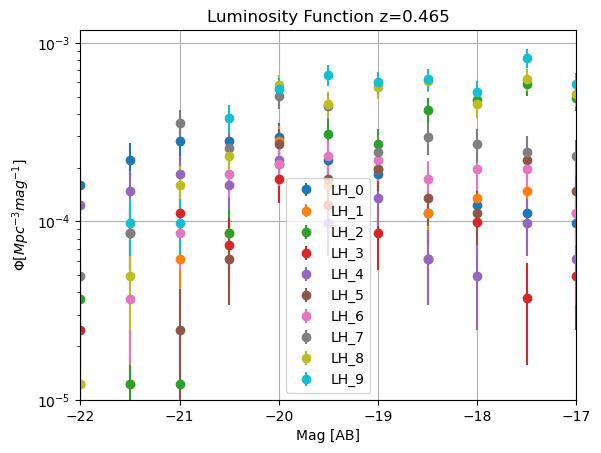

In [13]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data

# Plot the luminosity function for each LH_X value
for i, row in df.iterrows():
    plt.errorbar(row['bins'], row['phi'], yerr=row['phi_sigma'], fmt='o', label=row['LH_X'])
    #plt.plot(row['bins'], row['phi'], label=row['LH_X'])

plt.xlabel('Mag [AB]')
plt.ylabel('$\Phi [Mpc^{-3} mag^{-1}]$')
plt.yscale('log')
plt.legend()  # Add legend

plt.title('Luminosity Function z=0.465')
plt.grid(True)

# Set the x-axis and y-axis limits
plt.xlim(-22, -17)  # Replace xmin and xmax with your desired limits for the x-axis
plt.ylim(1e-5,0)  
plt.show()


In [10]:
specific_row = df[df['LH_X'] == 'LH_103']
specific_row


,LH_X,phi,phi_sigma,bins
6,LH_103,"[2.4596081783550438e-05, 8.608628624242653e-05...","[1.739205621976743e-05, 3.253755781294024e-05,...","[-22.0, -21.5, -21.0, -20.5, -20.0, -19.5, -19..."


/tmp/ipykernel_4777/4189258938.py:22: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(1e-5, 0)


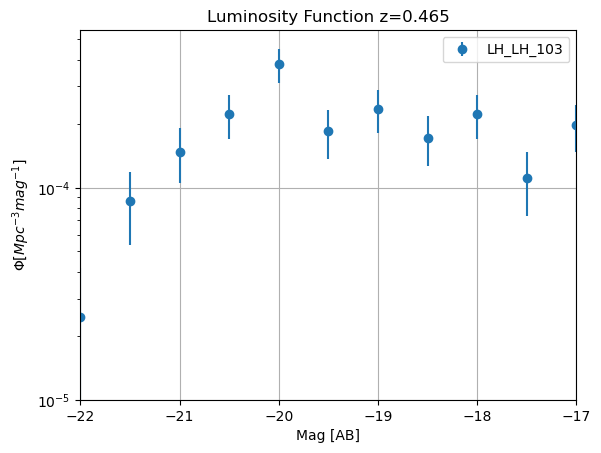

In [11]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# Filter for LH_X == 103
specific_row = df[df['LH_X'] == 'LH_103']

# Check if the specific row is found
if not specific_row.empty:
    row = specific_row.iloc[0]
    plt.errorbar(row['bins'], row['phi'], yerr=row['phi_sigma'], fmt='o', label=f'LH_{row["LH_X"]}')
    
    plt.xlabel('Mag [AB]')
    plt.ylabel('$\Phi [Mpc^{-3} mag^{-1}]$')
    plt.yscale('log')
    plt.legend()  # Add legend

    plt.title('Luminosity Function z=0.465')
    plt.grid(True)

    # Set the x-axis and y-axis limits
    plt.xlim(-22, -17)  # Replace xmin and xmax with your desired limits for the x-axis
    plt.ylim(1e-5, 0)  
    plt.show()
else:
    print("No data found for LH_X == 103")
